In [2]:
import numpy as np
import cmath
import matplotlib.pyplot as plt 
%matplotlib inline

# Задание №1

In [3]:
n = 1000
a = np.random.normal(0, 1, (n,n))
A = a + a.T
#спектр собственных значений
#spectrum = np.diagflat(A)

[[-89.50396289   0.           0.         ...   0.           0.
    0.        ]
 [  0.         -87.36326911   0.         ...   0.           0.
    0.        ]
 [  0.           0.         -87.15204917 ...   0.           0.
    0.        ]
 ...
 [  0.           0.           0.         ...  86.90528047   0.
    0.        ]
 [  0.           0.           0.         ...   0.          87.47641665
    0.        ]
 [  0.           0.           0.         ...   0.           0.
   88.31150372]]


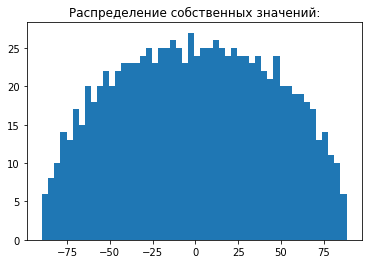

In [4]:
Vec_l = np.linalg.eigvalsh(A)
#спектр собственных значений
spectrum = np.diagflat(Vec_l)
print(spectrum)
plt.title('Распределение собственных значений:')
plt.hist(Vec_l, bins=50)
plt.show()

# Задание №2

In [6]:
n = 10
a = np.random.normal(0, 1, (n, n))
A = a@a.T

eigen_values = np.linalg.eigvalsh(A)
spectrum = np.diagflat(eigen_values)
min_l = min(np.diag(A))
k = 0
while abs(eigen_values.min()-min_l) > abs(0.01*eigen_values.min()):
    Q, R = np.linalg.qr(A)
    A = R@Q
    min_l = min(np.diag(A))
    k += 1
print(k)

2


# Задание №4

In [7]:
#1
A = np.array([[3, 1, 0, 0], [1, 2, 0, 1], [0, 0, 1, 1], [0, 1, 1, 1]])
random_vector = np.random.random(4)
error = 0.01
vec1 = np.copy(random_vector)
vec0 = np.zeros(4)
k = 0

while np.linalg.norm(vec0-vec1) > error:
    vec0 = vec1
    vec1 = A@vec0
    vec1 /= np.linalg.norm(vec1)
    k += 1
    
m = (A@vec1)[0]/vec1[0]
print('Кол-во итераций:', k)
print('Вектор, соответствующий наибольшему значению, полученный путем итераций:', round(m, 3))
print('Настоящий вектор, соответствующий наибольшему значению:', round(max(np.linalg.eigvalsh(A)),3))


Кол-во итераций: 8
Вектор, соответствующий наибольшему значению, полученный путем итераций: 3.764
Настоящий вектор, соответствующий наибольшему значению: 3.751


In [8]:
#2
error = 0.01
I = np.eye(4)
Mu = [3.5, 3.7] 


for l in Mu:
    A_reverse = np.linalg.inv(A-I*l)
    v = np.copy(random_vector)
    v_0 = np.zeros(4)
    k = 0
    
    while np.linalg.norm(v_0-v) > error:
        v_0 = v
        v = v_0@A_reverse
        v /= np.linalg.norm(v)
        k += 1
    m = (A@v)[0]/v[0]
    print(l)
    print('Кол-во итераций:', k)
    print('Вектор, соответствующий наибольшему значению, полученный путем итераций:', round(m, 3))
    print('Настоящий вектор, соответствующий наибольшему значению:', round(max(np.linalg.eigvalsh(A)),3))


3.5
Кол-во итераций: 4
Вектор, соответствующий наибольшему значению, полученный путем итераций: 3.752
Настоящий вектор, соответствующий наибольшему значению: 3.751
3.7
Кол-во итераций: 3
Вектор, соответствующий наибольшему значению, полученный путем итераций: 3.751
Настоящий вектор, соответствующий наибольшему значению: 3.751


# Задание №5

[[-1.  1.  1. ...  0.  0.  0.]
 [ 0. -1.  1. ...  0.  0.  0.]
 [ 0.  0. -1. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... -1.  1.  1.]
 [ 0.  0.  0. ...  0. -1.  1.]
 [ 0.  0.  0. ...  0.  0. -1.]]


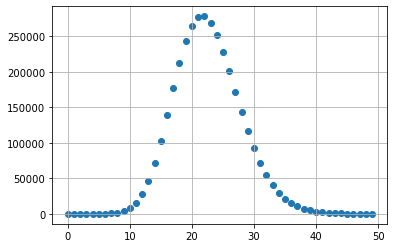

In [15]:
from scipy.linalg import expm
def croneker(i,j):
    if i == j:
        return 1
    if i != j:
        return 0
A=np.zeros((32,32))
for i in range(32):
        for j in range(32):
            A[i,j]=-croneker(i,j)+croneker(i,j-1)+croneker(i,j-2)
print(A)
T=[]
Exp=[]
t=0
while t < 50:
    T.append(t)
    Exp.append(np.linalg.norm(expm(A*t), ord='fro'))
    t+=1
import matplotlib.pyplot as plt
plt.scatter(T, Exp)
plt.grid()
plt.show()